In [63]:
#World Military Powers 

In [50]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("World military power.xlsx.xlsx")
#df = pd.read_csv("World military power.csv", encoding="latin1")

In [4]:
#pd.set_option('display.float_format', '{:.2f}'.format)
#df.describe()

In [5]:
df.sample(100)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
15,Bolivia,0.9942,Bolivia,69,Bolivia,0,Bolivia,0,Bolivia,14,...,Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000,Bolivia,7252
87,Nigeria,0.6485,Nigeria,129,Nigeria,8,Nigeria,13,Nigeria,21,...,Nigeria,"20,34,52,505",Nigeria,"9,23,768",Nigeria,853,Nigeria,8600,Nigeria,4477
42,Gabon,3.3736,Gabon,23,Gabon,6,Gabon,0,Gabon,2,...,Gabon,"21,19,036",Gabon,"2,67,667",Gabon,885,Gabon,1600,Gabon,3261
86,Niger,2.0153,Niger,16,Niger,0,Niger,2,Niger,5,...,Niger,"1,98,66,231",Niger,"12,67,000",NaN,NaN,Niger,300,Niger,5834
47,Guatemala,1.8302,Guatemala,33,Guatemala,0,Guatemala,4,Guatemala,8,...,Guatemala,"1,65,81,273",Guatemala,"1,08,889",Guatemala,400,Guatemala,990,Guatemala,1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Libya,1.3696,Libya,114,Libya,17,Libya,2,Libya,4,...,Libya,"67,54,507",Libya,"17,59,540",Libya,1770,Libya,0,Libya,4339
84,New Zealand,1.3684,New Zealand,48,New Zealand,0,New Zealand,0,New Zealand,7,...,New Zealand,"45,45,627",New Zealand,"2,67,710",New Zealand,15134,New Zealand,0,NaN,NaN
105,Sierra Leone,4.2063,Sierra Leone,5,Sierra Leone,0,Sierra Leone,0,Sierra Leone,0,...,Sierra Leone,"63,12,212",Sierra Leone,71740,Sierra Leone,402,Sierra Leone,800,Sierra Leone,1093
133,Uzbekistan,0.8086,Uzbekistan,185,Uzbekistan,66,Uzbekistan,20,Uzbekistan,18,...,Uzbekistan,"3,00,23,709",Uzbekistan,"4,47,400",Uzbekistan,420,Uzbekistan,1100,Uzbekistan,6893


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#assign correct column names 
col2 = df.iloc[0][:]
df.columns = col2

In [8]:
df.columns = (df.columns).str.lower()

In [9]:
#delete the first row , avoid repeating 
df.drop(index=df.index[0], axis=0, inplace=True)

In [10]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

0
military strength                          0
military strength power index              0
aircraft strength                          0
aircraft strength value                    0
fighter/interceptor strength               0
fighter/interceptor strength value         0
attack aircraft strength                   0
attack aircraft strength value             0
transport aircraft fleet strength          0
transport aircraft fleet strength value    0
trainer aircraft fleet                     0
trainer aircraft fleet value               0
helicopter fleet strength                  0
helicopter fleet strength value            0
attack helicopter fleet strength           0
attack helicopter fleet strength value     0
tank strength                              0
tank strength value                        0
afv/apc strength                           0
afv/apc strength value                     0
self-propelled artillery strength          0
self-propelled artillery strength value    0
towed ar

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military strength power index            138 non-null    float64
 1   aircraft strength value                  138 non-null    int32  
 2   fighter/interceptor strength value       138 non-null    int32  
 3   attack aircraft strength value           138 non-null    int32  
 4   transport aircraft fleet strength value  138 non-null    int32  
 5   trainer aircraft fleet value             138 non-null    int32  
 6   helicopter fleet strength value          138 non-null    int32  
 7   attack helicopter fleet strength value   138 non-null    int32  
 8   tank strength value                      138 non-null    int32  
 9   afv/apc strength value                   138 non-null    int32  
 10  self-propelled artillery strength value  138 non-n

In [13]:
#df.columns = (df.columns).str.replace(' ','')

In [14]:
# convert type of object to float
df['military strength power index']= df['military strength power index'].astype(float)

In [15]:
del_col = [];
for col_nm in df.columns :
    splt_col_nm = col_nm.split()
    #print(splt_col_nm[-1])
    #print(col_nm)
    if (splt_col_nm[-1] == 'index') or (splt_col_nm[-1] == 'value') :
        print(col_nm)
    else:
        del_col.append(col_nm)

#df = df.drop('column_name', axis=1)
df.drop(del_col, axis=1, inplace=True)        

military strength power index
aircraft strength value
fighter/interceptor strength value
attack aircraft strength value
transport aircraft fleet strength value
trainer aircraft fleet value
helicopter fleet strength value
attack helicopter fleet strength value
tank strength value
afv/apc strength value
self-propelled artillery strength value
towed artillery strength value
rocket projector strength value
navy fleet strengths value
aircraft carrier fleet strength value
submarine fleet strength value
destroyer fleet strength value
frigate fleet strength value
defense spending budget value
external debt value
airport totals value
oil production value
oil consumption value
proven oil reserves value
available manpower value
total population value
total square land area value
total coastline coverage value
total waterway coverage value
total border coverage value


In [16]:
df['aircraft strength value']= df['aircraft strength value'].astype(int)
df['fighter/interceptor strength value']= df['fighter/interceptor strength value'].astype(int)
df['attack aircraft strength value']= df['attack aircraft strength value'].astype(int)
df['transport aircraft fleet strength value']= df['transport aircraft fleet strength value'].astype(int)
df['trainer aircraft fleet value']= df['trainer aircraft fleet value'].astype(int)
df['helicopter fleet strength value'] = df['helicopter fleet strength value'].astype(int)
df[['attack helicopter fleet strength value', 'tank strength value'] ] = df[['attack helicopter fleet strength value','tank strength value'] ].astype(int)
df[['afv/apc strength value', 'self-propelled artillery strength value',
       'towed artillery strength value', 'rocket projector strength value']] = df[['afv/apc strength value', 'self-propelled artillery strength value',
       'towed artillery strength value', 'rocket projector strength value']].astype(int)

In [17]:
df.isnull().sum()

0
military strength power index              0
aircraft strength value                    0
fighter/interceptor strength value         0
attack aircraft strength value             0
transport aircraft fleet strength value    0
trainer aircraft fleet value               0
helicopter fleet strength value            0
attack helicopter fleet strength value     0
tank strength value                        0
afv/apc strength value                     0
self-propelled artillery strength value    0
towed artillery strength value             0
rocket projector strength value            0
navy fleet strengths value                 0
aircraft carrier fleet strength value      0
submarine fleet strength value             0
destroyer fleet strength value             0
frigate fleet strength value               0
defense spending budget value              0
external debt value                        0
airport totals value                       0
oil production value                       0
oil cons

In [18]:
df.columns= df.columns.str.strip().str.lower()


In [19]:
df['oil consumption value']= df['oil consumption value'].astype(str)
df['defense spending budget value'] = df['defense spending budget value'].str.replace(',','')
df['defense spending budget value']= df['defense spending budget value'].astype(float)

In [20]:
df['oil consumption value']= df['oil consumption value'].astype(str)
df['external debt value'] = df['external debt value'].str.replace(',','')
df['external debt value']= df['external debt value'].astype(float)

In [21]:
df['airport totals value']= df['airport totals value'].astype(int)

In [22]:
#df['oil production value'] = df['oil production value'].str.replace(',','')
#df['oil production value']= df['oil production value'].astype(float)
(df == 0).sum()

0
military strength power index                0
aircraft strength value                      2
fighter/interceptor strength value          46
attack aircraft strength value              75
transport aircraft fleet strength value     15
trainer aircraft fleet value                25
helicopter fleet strength value              2
attack helicopter fleet strength value      63
tank strength value                         24
afv/apc strength value                       1
self-propelled artillery strength value     52
towed artillery strength value              24
rocket projector strength value             46
navy fleet strengths value                  28
aircraft carrier fleet strength value      125
submarine fleet strength value              97
destroyer fleet strength value             126
frigate fleet strength value                84
defense spending budget value                0
external debt value                          0
airport totals value                         0
oil product

In [23]:
# values are mixed as str and int. so convert the column to string

df['oil consumption value']= df['oil consumption value'].astype(str)
df['oil consumption value'] = df['oil consumption value'].str.replace(',','')
df['oil consumption value']= df['oil consumption value'].astype(float)


In [24]:
df['oil production value']= df['oil production value'].astype(str)
df['oil production value'] = df['oil production value'].str.replace(',','')
df['oil production value']= df['oil production value'].astype(float)

In [25]:
str_col = 'proven oil reserves value'
df[str_col]= df[str_col].astype(str)
df[str_col] = df[str_col].str.replace(',','')
df[str_col]= df[str_col].astype(float)

In [26]:
str_col = 'available manpower value'
df[str_col]= df[str_col].astype(str)
df[str_col] = df[str_col].str.replace(',','')
df[str_col]= df[str_col].astype(float)


In [27]:
str_col = 'total population value'
df[str_col]= df[str_col].astype(str)
df[str_col] = df[str_col].str.replace(',','')
df[str_col]= df[str_col].astype(float)

In [28]:
str_col = 'total square land area value'
df[str_col]= df[str_col].astype(str)
df[str_col] = df[str_col].str.replace(',','')
df[str_col]= df[str_col].astype(float)


In [29]:
str_col = 'total waterway coverage value'
df[str_col]= df[str_col].astype(str)
df[str_col] = df[str_col].str.replace(',','')
df[str_col]= df[str_col].astype(float)

In [30]:
# Null elementlerin tahmini
#Veri miktrari az oldugundan regresyon ile tahmin etmeye gerek duymadim. 


In [31]:
#average ile doldurulacak sutun
col_avg = 'navy fleet strengths value'

#df[col_avg]= df[col_avg].astype(str)
#df[col_avg] = df[col_avg].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)


In [32]:
col_avg = 'aircraft carrier fleet strength value'

#df[col_avg]= df[col_avg].astype(str)
#df[col_avg] = df[col_avg].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)

In [33]:
col_avg = 'submarine fleet strength value'

#df[col_avg]= df[col_avg].astype(str)
#df[col_avg] = df[col_avg].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)


In [34]:
col_avg = 'destroyer fleet strength value'

#df[col_avg]= df[col_avg].astype(str)
#df[col_avg] = df[col_avg].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)


In [35]:
col_avg = 'frigate fleet strength value'

#df[col_avg]= df[col_avg].astype(str)
#df[col_avg] = df[col_avg].str.replace('\D', '', regex=True)
nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)


In [36]:
col_avg = 'total coastline coverage value'
#for num in df[col_avg] :
#    print(num)
#    print("{} {}".format(num,type(num)))
    #print(type(num))
    #if num != np.nan :
    #    print(num)
#mylist = [];    
#for index, row in df.iterrows():
#    if row[col_avg] == '2,02,080':
#        print(row[col_avg])
#    #mylist.append(row[col_avg])
#print(mylist)
#df['total coastline coverage value'] = mylist

In [37]:
#print(mylist)

In [38]:
# first obtain non-null rows from the column. 
# then convert the column to string because there could be integer type columns
# then clean , from column so that it can be converted to number
# fill the null elementns with basic statistical values

col_avg = 'total coastline coverage value'
#df[col_avg] = df[col_avg].str.replace(' ','')
df[col_avg] = df[col_avg].astype(str)

nan_index = df.loc[pd.isna(df[col_avg]), :].index
df2 = df.drop(nan_index)
df2[col_avg]= df2[col_avg].astype(str)
df2[col_avg] = df2[col_avg].str.replace("'",'')
df2[col_avg] = df2[col_avg].str.replace(',','')
df2[col_avg] = df2[col_avg].astype(float)
#df2[col_avg].mean()





In [39]:
df[col_avg]

1         0
2       362
3       998
4      1600
5      4989
       ... 
134    2800
135    3444
136    1906
137       0
138       0
Name: total coastline coverage value, Length: 138, dtype: object

In [40]:
#df2[col_avg] = df2[col_avg].str.replace('\D', '', regex=True)
#df[col_avg] = df[col_avg].str.replace(',',"")
#df2[col_avg] = df2[col_avg].astype(int)
df[col_avg] = df[col_avg].fillna( ( df2[col_avg].mean() ) )
df[col_avg] = df[col_avg].astype(float)

In [ ]:
#classification 

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:

x = df;

In [52]:
model = KMeans(4)
model = model.fit(x)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
tahmin = model.predict(x)

In [54]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [55]:
x['cluster'] = tahmin

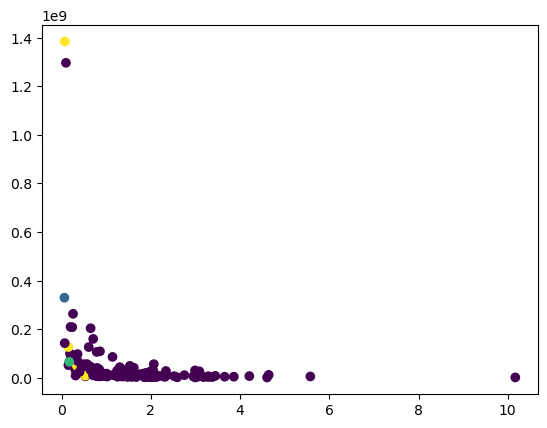

In [56]:
plt.figure()
plt.scatter(x['military strength power index'], x["total population value"], c = tahmin)

In [57]:
allscore= []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane):
        i = i+1
        model   = KMeans(i)
        model   = model.fit(x)
        tahmin  = model.predict(x)
        score   = silhouette_score(x,tahmin)
        distance = model.inertia_
        print('cluster ',i," score: ", score)
        allscore.append(score) 
        allclusters.append(i)
        distances.append(distance)
        

In [58]:
clust(10)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  2  score:  0.9227153206136329


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  3  score:  0.8995442950361631


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  4  score:  0.8671436271439987


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  5  score:  0.8675195540746111


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  6  score:  0.7789462745536555


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  7  score:  0.7817947546427708


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  8  score:  0.7847423623940264


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  9  score:  0.6818555400770482


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster  10  score:  0.6795886784648338


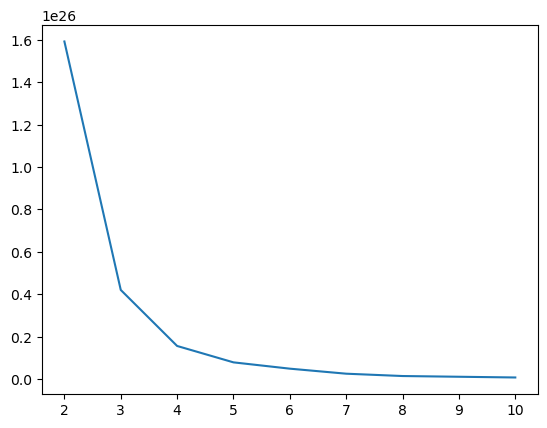

In [59]:
plt.plot(allclusters,distances)

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
link_data = linkage(x, method = "ward", metric = "euclidean")

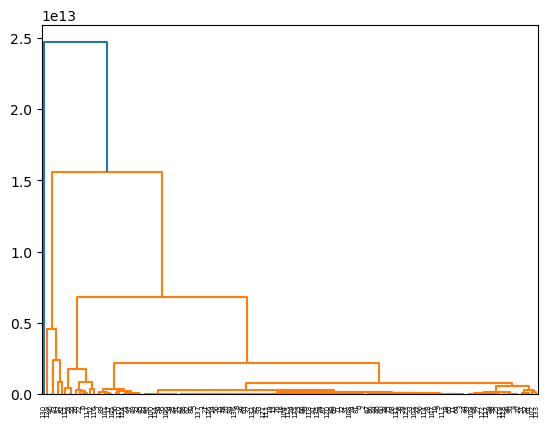

In [62]:
dendrogram(link_data)
plt.show()